Cluster Labels:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1]

Number of clusters found: 2
Number of noise points: 35


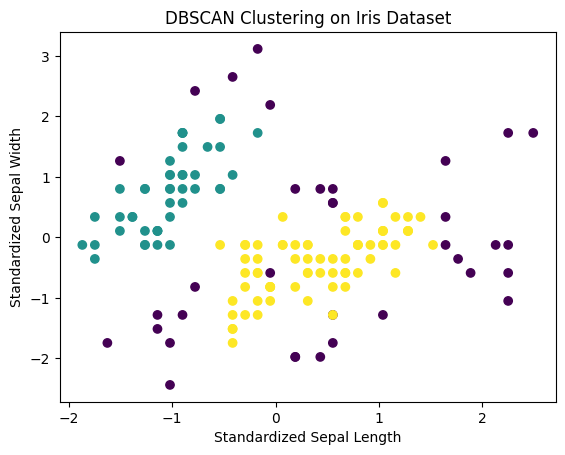

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# ===============================
# Read Iris Dataset
# ===============================

df = pd.read_csv("Iris(in).csv")

# Extract feature columns
X = df[[
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width"
]]

# ===============================
# Standardize Features
# ===============================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# Apply DBSCAN
# ===============================

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# ===============================
# Print Results
# ===============================

print("Cluster Labels:")
print(labels)

# Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Number of noise points
n_noise = list(labels).count(-1)

print("\nNumber of clusters found:", n_clusters)
print("Number of noise points:", n_noise)

# ===============================
# Scatter Plot
# ===============================

plt.figure()
plt.scatter(
    X_scaled[:, 0],   # sepal_length
    X_scaled[:, 1],   # sepal_width
    c=labels
)
plt.xlabel("Standardized Sepal Length")
plt.ylabel("Standardized Sepal Width")
plt.title("DBSCAN Clustering on Iris Dataset")
plt.show()
